In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

/home/dotrungkien/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
raw_train = pd.read_csv('../input/fashion-mnist_train.csv')
raw_test = pd.read_csv('../input/fashion-mnist_test.csv')

In [3]:
raw_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = raw_train.iloc[:, 1:]
x_test = raw_test.iloc[:, 1:]
y_train = raw_train['label']
y_test = raw_test['label']

In [6]:
type(x_train), type(x_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [7]:
x_train = np.asarray(x_train) / 255.0
x_test = np.asarray(x_test) / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# y_train = np.asarray(y_train)
# y_test = np.asarray(y_test)

In [8]:
type(x_train), type(x_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [11]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [13]:
model = Sequential()

model.add(Conv2D(32, 5, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, 5, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding='same', activation ='relu'))
model.add(Conv2D(64, 3, padding='same', activation ='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [24]:
epochs = 20
batch_size = 100

In [25]:
best_model_ckpt = ModelCheckpoint(filepath='models/fashion_mnist_cnn_keras.hdf5', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train,
#                    validation_data=(x_val, y_val),
                    validation_split=0.15,
                    epochs=epochs, 
                    batch_size=batch_size,
                    callbacks=[best_model_ckpt])

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 6s 111us/step - loss: 0.1153 - acc: 0.9563 - val_loss: 0.2075 - val_acc: 0.9323
Epoch 2/20
51000/51000 [==============================] - 6s 112us/step - loss: 0.1110 - acc: 0.9575 - val_loss: 0.2007 - val_acc: 0.9381
Epoch 3/20
51000/51000 [==============================] - 6s 111us/step - loss: 0.1034 - acc: 0.9606 - val_loss: 0.2093 - val_acc: 0.9390
Epoch 4/20
51000/51000 [==============================] - 6s 111us/step - loss: 0.1065 - acc: 0.9600 - val_loss: 0.2022 - val_acc: 0.9370
Epoch 5/20
51000/51000 [==============================] - 6s 108us/step - loss: 0.0999 - acc: 0.9630 - val_loss: 0.2236 - val_acc: 0.9361
Epoch 6/20
51000/51000 [==============================] - 5s 105us/step - loss: 0.0964 - acc: 0.9631 - val_loss: 0.2098 - val_acc: 0.9384
Epoch 7/20
51000/51000 [==============================] - 5s 104us/step - loss: 0.0985 - acc: 0.9634 - val_loss: 0.2138 - v

In [26]:
from keras.models import load_model
model = load_model('models/fashion_mnist_cnn_keras.hdf5')
score = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(score[0]))
print('Test Acc: {}'.format(score[1]))

10000/10000 [==============================] - 1s 83us/step
Test Loss: 0.19414064766094088
Test Acc: 0.9367


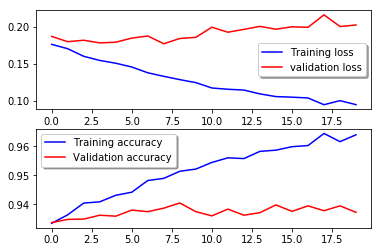

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

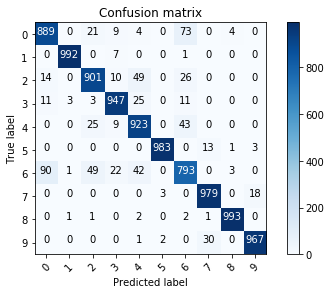

In [29]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1) 
# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_matrix, classes = range(10)) 